In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
data_dir = 'data/'
train_dir = 'train'
test_dir = 'test'

# Create train and test directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get class names from folder names in the data directory
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for cls in classes:
    class_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
    # Split images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create class subdirectories in train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    # Move images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, cls, img))
        
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, cls, img))

print("Dataset split into training and test sets.")
    

Dataset split into training and test sets.


In [25]:
target_size = (256, 256)  # Update to 256x256

In [10]:
import cv2

def print_image_size(image_path):
    """
    Prints the dimensions (width and height) of the image at the given path.

    Args:
        image_path (str): The path to the image file.
    """
    img = cv2.imread(image_path)
    if img is not None:
        height, width, _ = img.shape
        print(f"{image_path}: {width}x{height}")
    else:
        print(f"Failed to read image: {image_path}")

# Example usage
if __name__ == "__main__":
    image_path = 'train\cloudy\train_12.jpg'
    print_image_size(image_path)


Failed to read image: train\cloudy	rain_12.jpg


In [8]:
# Function to resize and save images
def resize_and_save_image(src_path, dest_path, size):
    img = cv2.imread(src_path)
    if img is not None:
            resized_img = cv2.resize(img, size)
            cv2.imwrite(dest_path, resized_img)
            print(f"Resized and saved: {dest_path}")
    else:
            print(f"Failed to read image: {src_path}")

In [11]:

# Process and resize training images
for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_dir, cls, img)
        resize_and_save_image(src_path, dest_path, (256,256))
        print_image_size(dest_path)  # Print new size after resizing
        
    # Copy test images without resizing
for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(test_dir, cls, img)
        shutil.copy(src_path, dest_path)
        print_image_size(dest_path)  # Print original size

Resized and saved: train\water\SeaLake_1757.jpg
train\water\SeaLake_1757.jpg: 256x256
Resized and saved: train\water\SeaLake_2146.jpg
train\water\SeaLake_2146.jpg: 256x256
Resized and saved: train\water\SeaLake_993.jpg
train\water\SeaLake_993.jpg: 256x256
Resized and saved: train\water\SeaLake_65.jpg
train\water\SeaLake_65.jpg: 256x256
Resized and saved: train\water\SeaLake_1641.jpg
train\water\SeaLake_1641.jpg: 256x256
Resized and saved: train\water\SeaLake_1705.jpg
train\water\SeaLake_1705.jpg: 256x256
Resized and saved: train\water\SeaLake_988.jpg
train\water\SeaLake_988.jpg: 256x256
Resized and saved: train\water\SeaLake_480.jpg
train\water\SeaLake_480.jpg: 256x256
Resized and saved: train\water\SeaLake_2514.jpg
train\water\SeaLake_2514.jpg: 256x256
Resized and saved: train\water\SeaLake_1654.jpg
train\water\SeaLake_1654.jpg: 256x256
Resized and saved: train\water\SeaLake_1860.jpg
train\water\SeaLake_1860.jpg: 256x256
Resized and saved: train\water\SeaLake_767.jpg
train\water\SeaLa

In [13]:
import cv2

def print_image_and_size(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if img is not None:
        # Get image dimensions
        height, width, _ = img.shape
        print(f"Image size: {width}x{height}")
        
        # Display the image
        cv2.imshow("Image", img)
        
        # Wait for a key press and close the image window
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f"Failed to read image: {image_path}")

# Example usage
image_path = 'train\water\SeaLake_1.jpg'
print_image_and_size(image_path)


Image size: 256x256


In [14]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:

# Paths
data_dir = 'data'
train_dir = 'train'
test_dir = 'test'
val_dir = 'val'

# Desired image size for the model input
target_size = (256, 256)  # Update to 256x256

# Create train, test, and val directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get class names from folder names in the data directory
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for cls in classes:
    class_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
    # Split images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create class subdirectories in train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    
    # Function to print image size using OpenCV
    def print_image_size(image_path):
        img = cv2.imread(image_path)
        if img is not None:
            height, width, _ = img.shape
            print(f"{image_path}: {width}x{height}")
        else:
            print(f"Failed to read image: {image_path}")
    
    # Function to resize and save images
    def resize_and_save_image(src_path, dest_path, size):
        img = cv2.imread(src_path)
        if img is not None:
            resized_img = cv2.resize(img, size)
            cv2.imwrite(dest_path, resized_img)
            print(f"Resized and saved: {dest_path}")
        else:
            print(f"Failed to read image: {src_path}")

    # Process and resize training images
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_dir, cls, img)
        resize_and_save_image(src_path, dest_path, target_size)
        print_image_size(dest_path)  # Print new size after resizing
        
    # Further split test images into validation and test sets
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
    
    # Copy validation images without resizing
    for img in val_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(val_dir, cls, img)
        shutil.copy(src_path, dest_path)
        print_image_size(dest_path)  # Print original size
        
    # Copy remaining test images without resizing
    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(test_dir, cls, img)
        shutil.copy(src_path, dest_path)
        print_image_size(dest_path)  # Print original size

print("Dataset split into training, validation, and test sets with training images resized.")


Resized and saved: train\cloudy\train_17584.jpg
train\cloudy\train_17584.jpg: 256x256
Resized and saved: train\cloudy\train_21016.jpg
train\cloudy\train_21016.jpg: 256x256
Resized and saved: train\cloudy\train_984.jpg
train\cloudy\train_984.jpg: 256x256
Resized and saved: train\cloudy\train_36016.jpg
train\cloudy\train_36016.jpg: 256x256
Resized and saved: train\cloudy\train_1663.jpg
train\cloudy\train_1663.jpg: 256x256
Resized and saved: train\cloudy\train_17200.jpg
train\cloudy\train_17200.jpg: 256x256
Resized and saved: train\cloudy\train_970.jpg
train\cloudy\train_970.jpg: 256x256
Resized and saved: train\cloudy\train_33597.jpg
train\cloudy\train_33597.jpg: 256x256
Resized and saved: train\cloudy\train_25219.jpg
train\cloudy\train_25219.jpg: 256x256
Resized and saved: train\cloudy\train_168.jpg
train\cloudy\train_168.jpg: 256x256
Resized and saved: train\cloudy\train_18567.jpg
train\cloudy\train_18567.jpg: 256x256
Resized and saved: train\cloudy\train_39781.jpg
train\cloudy\train_3

In [34]:
# Image data generator with rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [35]:

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)


Found 4504 images belonging to 4 classes.
Found 564 images belonging to 4 classes.
Found 563 images belonging to 4 classes.


In [43]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [44]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to check the shapes
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        2320      
                                                                 
 flatten_5 (Flatten)         (None, 57600)            

In [45]:

# Train the model
history = model.fit(
    train_generator,
    epochs=4,
    validation_data=val_generator
)


Epoch 1/4
141/141 [==============================] - 122s 853ms/step - loss: 0.5486 - accuracy: 0.7198 - val_loss: 0.5149 - val_accuracy: 0.7726
Epoch 2/4
141/141 [==============================] - 119s 843ms/step - loss: 0.4289 - accuracy: 0.8162 - val_loss: 0.3570 - val_accuracy: 0.8348
Epoch 3/4
141/141 [==============================] - 120s 850ms/step - loss: 0.4023 - accuracy: 0.8230 - val_loss: 0.3671 - val_accuracy: 0.8526
Epoch 4/4
141/141 [==============================] - 127s 899ms/step - loss: 0.3543 - accuracy: 0.8612 - val_loss: 0.3037 - val_accuracy: 0.8845


In [46]:

# Save the model
model.save('my_model.h5')


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


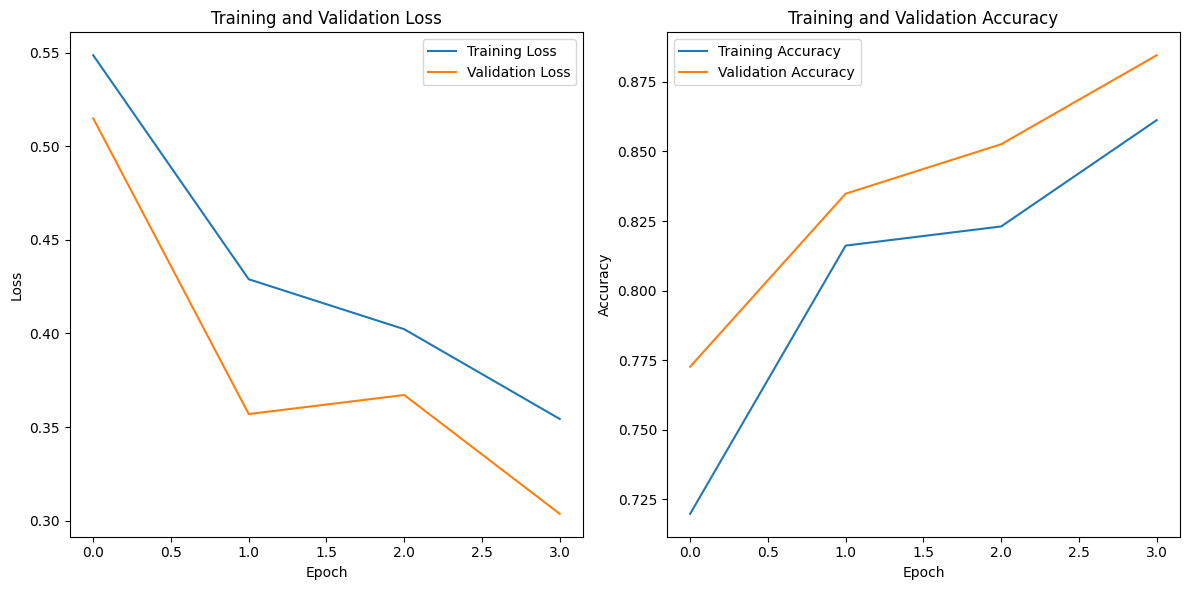

In [49]:
import matplotlib.pyplot as plt
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {round(test_acc,2)}")

18/18 [==============================] - 3s 153ms/step - loss: 0.3053 - accuracy: 0.8812
Test accuracy: 0.88


In [54]:
import tensorflow as tf


In [57]:
import numpy as np
# Example: Perform inference on a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    print("Predictions:", predictions)

    # Get predicted class index
    predicted_class = np.argmax(predictions[0])
    
    # Get class labels from the generator
    class_labels = list(test_generator.class_indices.keys())

    # Print predicted class
    print("Predicted class:", class_labels[predicted_class])

# Example usage:
image_path = 'test\desert\desert(11).jpg'
predict_single_image(image_path)


1/1 [==============================] - 0s 175ms/step
Predictions: [[3.0587366e-04 9.9968922e-01 4.6879536e-06 1.8494487e-07]]
Predicted class: desert


In [60]:
import numpy as np
# Example: Perform inference on a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    print("Predictions:", predictions)

    # Get predicted class index
    predicted_class = np.argmax(predictions[0])
    
    # Get class labels from the generator
    class_labels = list(test_generator.class_indices.keys())

    # Print predicted class
    print("Predicted class:", class_labels[predicted_class])

# Example usage:
image_path = 'test\water\SeaLake_2864.jpg'
predict_single_image(image_path)


1/1 [==============================] - 0s 30ms/step
Predictions: [[2.3023873e-04 1.3019571e-04 1.3752222e-02 9.8588735e-01]]
Predicted class: water


In [68]:
import numpy as np
# Example: Perform inference on a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    print("Predictions:", predictions)

    # Get predicted class index
    predicted_class = np.argmax(predictions[0])
    
    # Get class labels from the generator
    class_labels = list(test_generator.class_indices.keys())

    # Print predicted class
    print("Predicted class:", class_labels[predicted_class])

# Example usage:
image_path = r'test\cloudy\train_860.jpg'
predict_single_image(image_path)


1/1 [==============================] - 0s 100ms/step
Predictions: [[9.4723845e-01 5.2613843e-02 1.0002818e-04 4.7638405e-05]]
Predicted class: cloudy


In [69]:
import numpy as np
# Example: Perform inference on a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    print("Predictions:", predictions)

    # Get predicted class index
    predicted_class = np.argmax(predictions[0])
    
    # Get class labels from the generator
    class_labels = list(test_generator.class_indices.keys())

    # Print predicted class
    print("Predicted class:", class_labels[predicted_class])

# Example usage:
image_path = r'test\desert\desert(391).jpg'
predict_single_image(image_path)


1/1 [==============================] - 0s 34ms/step
Predictions: [[1.0261252e-05 9.9998975e-01 2.1273884e-08 1.2078855e-10]]
Predicted class: desert


In [73]:

import numpy as np
# Example: Perform inference on a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    print("Predictions:", predictions)

    # Get predicted class index
    predicted_class = np.argmax(predictions[0])
    
    # Get class labels from the generator
    class_labels = list(test_generator.class_indices.keys())

    # Print predicted class
    print("Predicted class:", class_labels[predicted_class])

# Example usage:
image_path = r'test\water\SeaLake_293.jpg'

predict_single_image(image_path)


1/1 [==============================] - 0s 50ms/step
Predictions: [[0.13299787 0.00131886 0.02017268 0.84551054]]
Predicted class: water


1/1 [==============================] - 0s 33ms/step


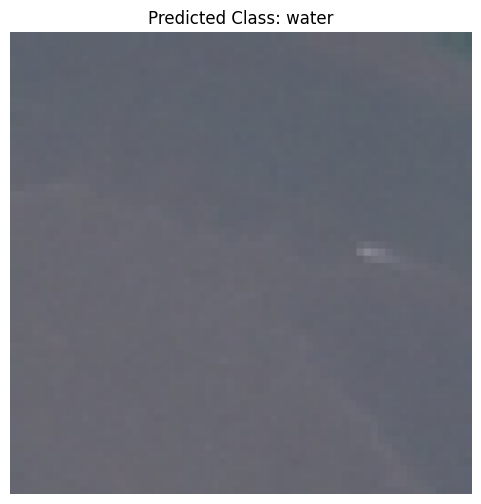

Predicted class: water
Probabilities: [0.13299787 0.00131886 0.02017268 0.84551054]


In [74]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` and `test_generator` are defined and loaded as in previous examples
# Define target size for model input
target_size = (256, 256)

def predict_single_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]

    # Plot the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Print predicted class and probabilities
    print("Predicted class:", predicted_class)
    print("Probabilities:", predictions[0])

# Example usage:
image_path = r'test\water\SeaLake_293.jpg'
class_labels = list(test_generator.class_indices.keys())  # Assuming test_generator is defined

predict_single_image(image_path, model, class_labels)


1/1 [==============================] - 0s 29ms/step


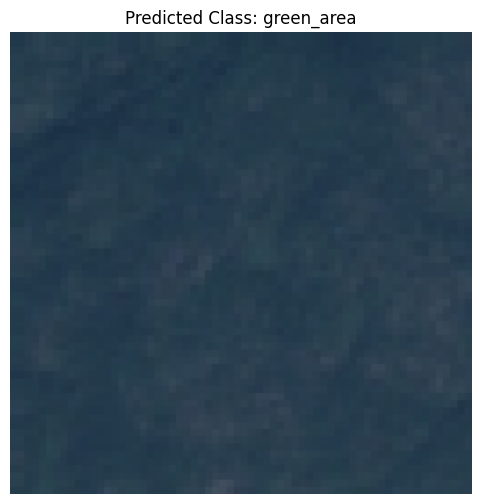

Predicted class: green_area
Probabilities: [8.0716127e-04 3.2390009e-05 8.5498261e-01 1.4417787e-01]


In [75]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` and `test_generator` are defined and loaded as in previous examples
# Define target size for model input
target_size = (256, 256)

def predict_single_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]

    # Plot the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Print predicted class and probabilities
    print("Predicted class:", predicted_class)
    print("Probabilities:", predictions[0])

# Example usage:
image_path = r'test\green_area\Forest_334.jpg'
class_labels = list(test_generator.class_indices.keys())  # Assuming test_generator is defined

predict_single_image(image_path, model, class_labels)


1/1 [==============================] - 0s 28ms/step


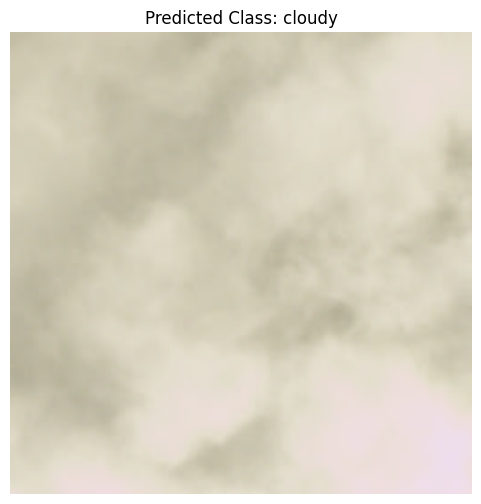

Predicted class: cloudy
Probabilities: [9.0522414e-01 9.4682336e-02 6.3770392e-05 2.9725810e-05]


In [76]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` and `test_generator` are defined and loaded as in previous examples
# Define target size for model input
target_size = (256, 256)

def predict_single_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]

    # Plot the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Print predicted class and probabilities
    print("Predicted class:", predicted_class)
    print("Probabilities:", predictions[0])

# Example usage:
image_path = r'test\cloudy\train_3014.jpg'
class_labels = list(test_generator.class_indices.keys())  # Assuming test_generator is defined

predict_single_image(image_path, model, class_labels)


1/1 [==============================] - 0s 30ms/step


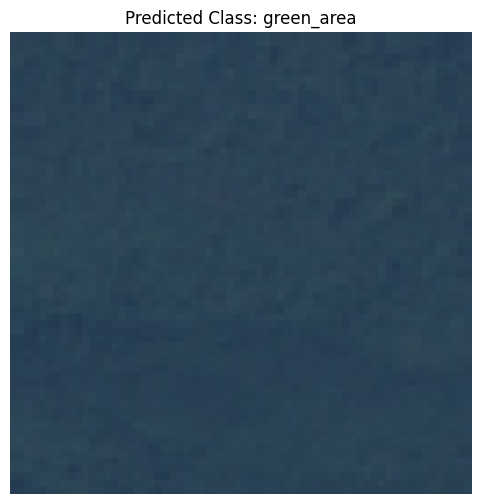

Predicted class: green_area
Probabilities: [7.9144951e-04 2.2314418e-05 7.8097254e-01 2.1821368e-01]


In [77]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` and `test_generator` are defined and loaded as in previous examples
# Define target size for model input
target_size = (256, 256)

def predict_single_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]

    # Plot the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Print predicted class and probabilities
    print("Predicted class:", predicted_class)
    print("Probabilities:", predictions[0])

# Example usage:
image_path = r'test\green_area\Forest_315.jpg'
class_labels = list(test_generator.class_indices.keys())  # Assuming test_generator is defined

predict_single_image(image_path, model, class_labels)


1/1 [==============================] - 0s 35ms/step


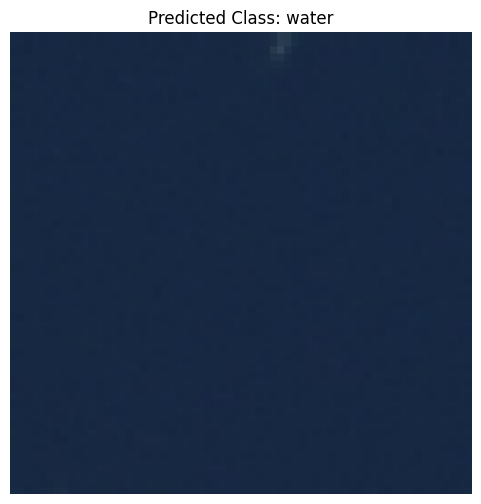

Predicted class: water
Probabilities: [2.8391267e-04 1.5648644e-04 1.6375383e-02 9.8318428e-01]


In [78]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` and `test_generator` are defined and loaded as in previous examples
# Define target size for model input
target_size = (256, 256)

def predict_single_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict probabilities for classes
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]

    # Plot the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Print predicted class and probabilities
    print("Predicted class:", predicted_class)
    print("Probabilities:", predictions[0])

# Example usage:
image_path = r'test\water\SeaLake_836.jpg'
class_labels = list(test_generator.class_indices.keys())  # Assuming test_generator is defined

predict_single_image(image_path, model, class_labels)
